# Датасет VOC2028

## Общий блок импорта

In [1]:
import torch
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib

import typing
import xml.etree.ElementTree as ET

import os
from tqdm import tqdm

from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image

import numpy as np
import torchvision.transforms.functional as F

#from ultralytics import YOLO
from PIL import Image
import cv2

from torchinfo import summary

from torchvision.ops import box_convert

%matplotlib inline

## Выбор места исполнения (локально, Google Colab, ...)

In [2]:
# Устанавливаем путь до датасета

# Локально
ds_path = '/home/vovk/SberUniversity/DS_from_03_10_2022/PM_Group_AN/FinalProj/HelmetDetection/VOC2028/'

# Colab
#from google.colab import drive
#drive.mount('/content/drive')
#!CHANGE! ds_path = '/content/drive/MyDrive/SberUniversity/PM_DS14AN/Fin/DataSet/'


## Подготовка и анализ датасета

### Чтение изображений и меток

#### Просмотр датасета

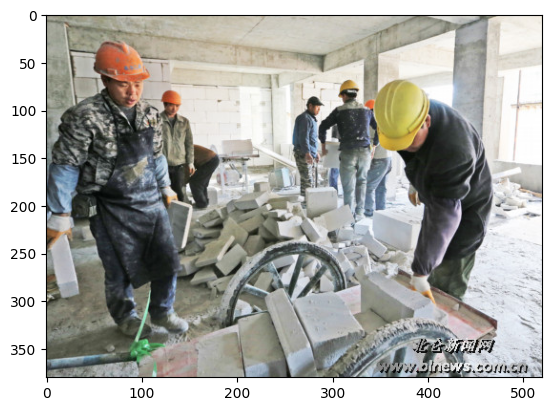

In [5]:
# Проверка путей и наличия датасета
I0 = img.imread(ds_path+'JPEGImages/000097.jpg', 'jpg')
plt.imshow(I0)
plt.show()

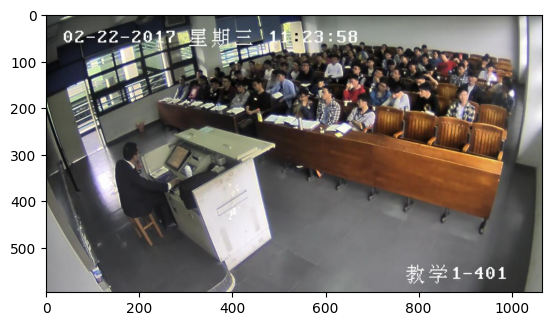

In [8]:
I1 = img.imread(ds_path+'JPEGImages/PartA_00025.jpg', 'jpg')
plt.imshow(I1)
plt.show()

Датасет состоит из нескольких частей, разделяемых по диапазону имён:
1. xxxxxx (6 цифр) - часть датасета преимущественно с касками на голове
2. part2_xxxxxx - также преимущественно люди в касках
3. PartA_xxxxx - фотографии security-камеры в одной учебной аудитории (без касок)
4. PartB_xxxxx - фотографии людей без касок в произвольных местах (преимущественно различные учебные помещения)

#### Парсинг меток